# Breast cancer wisconsin - random forest and ANN

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/home

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [77]:
df = pd.read_csv('data.csv')

In [78]:
df.set_index('id', inplace=True)

In [79]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [80]:
pd.set_option('display.max_columns', 50)

In [81]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [82]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [83]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [84]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Naive model

Before i start to analyze the data i want to run a basic model to get a benchmark and see how i can improve 

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_bench = df.drop(['diagnosis'],axis=1)
y_bench = df.diagnosis

In [15]:
x_train , x_test , y_train , y_test = train_test_split(X_bench , y_bench , test_size = 0.25 , random_state = 42)

In [16]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
prediction = model.predict(x_test)

In [20]:
print(classification_report(y_true=y_test,
                            y_pred=prediction))

             precision    recall  f1-score   support

          B       0.97      0.99      0.98        89
          M       0.98      0.94      0.96        54

avg / total       0.97      0.97      0.97       143



Naive Random forest model looks efficient (97% precision on the test) compared to other cases, however those 3% mistake could be crucial as it means 3% people will get false cancer test when they are actually sick.
And also i'd like to train and see how much/if i can improve it :)

In [21]:
print(pd.Series(model.feature_importances_,
                index=x_train.columns)) 

radius_mean                0.060923
texture_mean               0.030377
perimeter_mean             0.019674
area_mean                  0.006454
smoothness_mean            0.007972
compactness_mean           0.046590
concavity_mean             0.003345
concave points_mean        0.122400
symmetry_mean              0.006531
fractal_dimension_mean     0.005911
radius_se                  0.008322
texture_se                 0.003384
perimeter_se               0.001888
area_se                    0.030427
smoothness_se              0.009828
compactness_se             0.008629
concavity_se               0.005280
concave points_se          0.003630
symmetry_se                0.001619
fractal_dimension_se       0.004472
radius_worst               0.213337
texture_worst              0.035516
perimeter_worst            0.077565
area_worst                 0.024140
smoothness_worst           0.016604
compactness_worst          0.017784
concavity_worst            0.054443
concave points_worst       0

Feature importance suggestion on which features are more important , i'll a closer look when trying to improve results

# Explanatory Data Analysis - EDA

Data looks fine , no missing values , 
data types are ok so ill go into the data and start analyzing it.
i'll change diagnosis to numeric values with labelencoder and get to work

In [85]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [86]:
le = LabelEncoder() 
df['diagnosisLE'] = le.fit_transform(df['diagnosis'])

In [87]:
df.drop('diagnosis', axis=1, inplace=True)

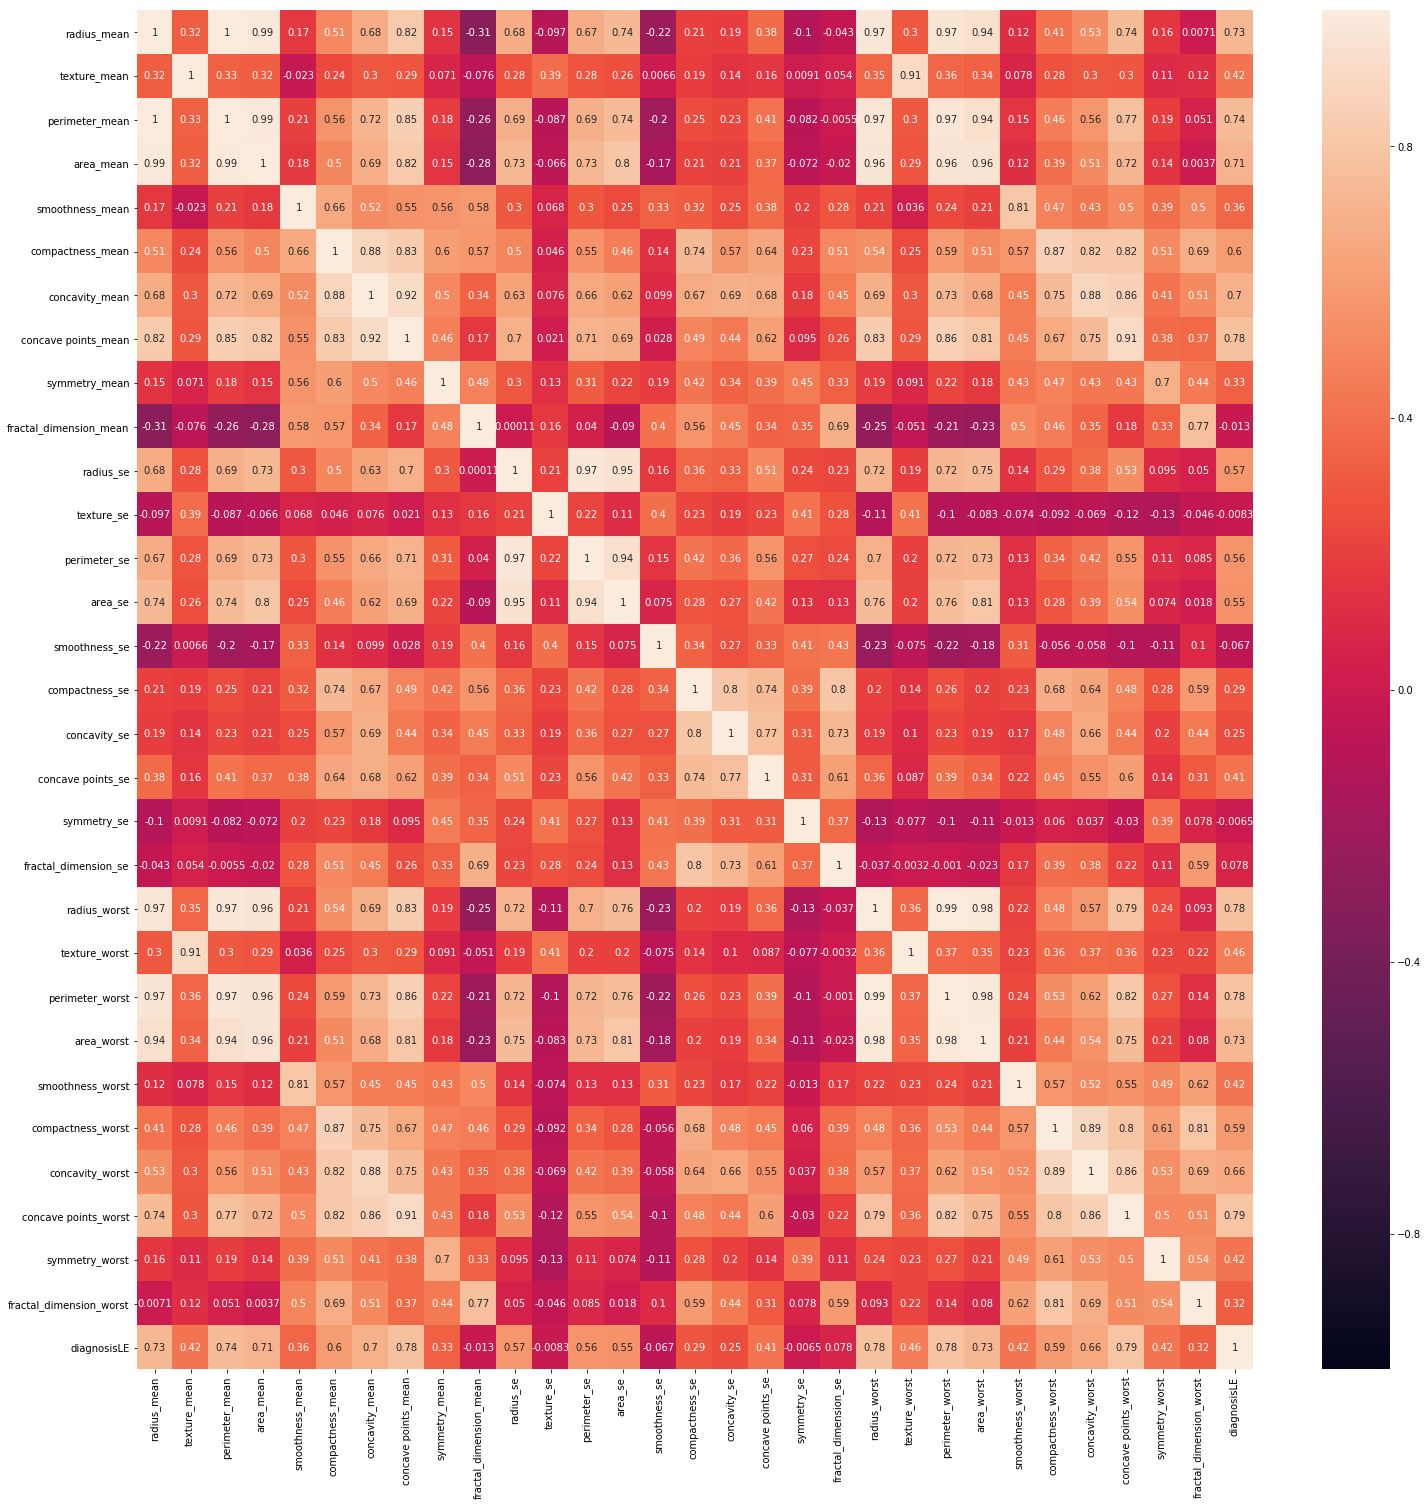

In [52]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr() , vmin =-1 , vmax = 1, annot=True)

Radius and concave points seems to contribute the most for identification

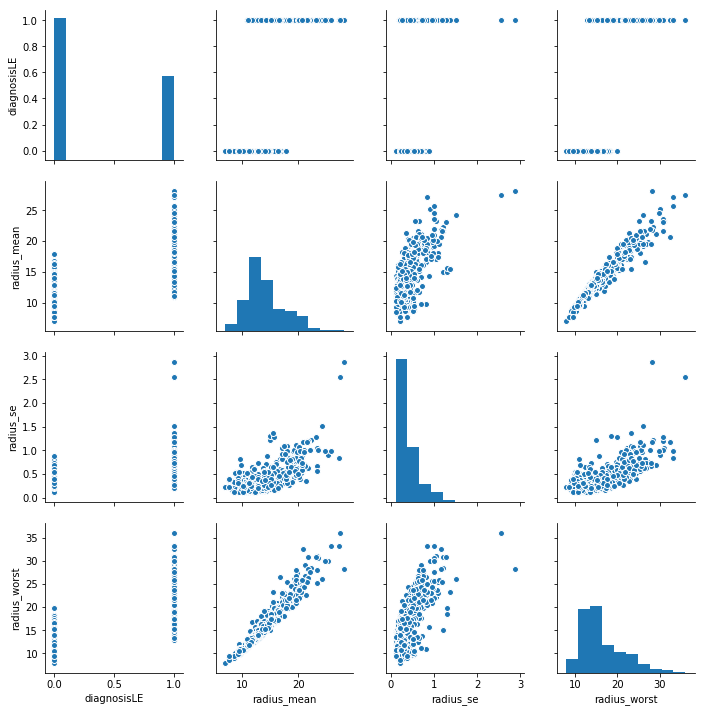

In [53]:
sns.pairplot(df[['diagnosisLE','radius_mean','radius_se','radius_worst']])

# Trying first ANN

In [30]:
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Dropout

C:\Users\ori\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Scaling the data and creating 2 hidden layers with 30 inputs (df # of columns) , 8 neurons , activation = relu and sigmoid for final layer to get probabilities.

In [148]:
sc = StandardScaler()

In [149]:
X_scale = df.iloc[:, :-1]
y_scale = df.iloc[:, -1]

In [150]:
x_train , x_test , y_train , y_test = train_test_split(X_scale , y_scale , test_size = 0.25 , random_state = 42)

In [151]:
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [152]:
clf = Sequential()

In [153]:
clf.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
clf.add(Dropout(rate=0.1))
clf.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
clf.add(Dropout(rate=0.1))
clf.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
clf.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
426/426 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.6455
Epoch 2/100
426/426 [==============================] - 0s 38us/step - loss: 0.6909 - acc: 0.6831
Epoch 3/100
426/426 [==============================] - 0s 35us/step - loss: 0.6882 - acc: 0.7183
Epoch 4/100
426/426 [==============================] - 0s 49us/step - loss: 0.6842 - acc: 0.7887
Epoch 5/100
426/426 [==============================] - 0s 45us/step - loss: 0.6782 - acc: 0.8380
Epoch 6/100
426/426 [==============================] - 0s 28us/step - loss: 0.6688 - acc: 0.8967
Epoch 7/100
426/426 [==============================] - 0s 40us/step - loss: 0.6560 - acc: 0.9155
Epoch 8/100
426/426 [==============================] - 0s 30us/step - loss: 0.6385 - acc: 0.9272
Epoch 9/100
426/426 [==============================] - 0s 28us/step - loss: 0.6138 - acc: 0.9249
Epoch 10/100
426/426 [==============================] - 0s 52us/step - loss: 0.5830 - acc: 0.9272
Epoch 11/100
426/426 [========

426/426 [==============================] - 0s 30us/step - loss: 0.0548 - acc: 0.9836
Epoch 85/100
426/426 [==============================] - 0s 28us/step - loss: 0.0554 - acc: 0.9836
Epoch 86/100
426/426 [==============================] - 0s 28us/step - loss: 0.0502 - acc: 0.9883
Epoch 87/100
426/426 [==============================] - 0s 28us/step - loss: 0.0505 - acc: 0.9836
Epoch 88/100
426/426 [==============================] - 0s 33us/step - loss: 0.0478 - acc: 0.9859
Epoch 89/100
426/426 [==============================] - 0s 40us/step - loss: 0.0581 - acc: 0.9836
Epoch 90/100
426/426 [==============================] - 0s 28us/step - loss: 0.0541 - acc: 0.9836
Epoch 91/100
426/426 [==============================] - 0s 28us/step - loss: 0.0525 - acc: 0.9859
Epoch 92/100
426/426 [==============================] - 0s 26us/step - loss: 0.0502 - acc: 0.9859
Epoch 93/100
426/426 [==============================] - 0s 30us/step - loss: 0.0521 - acc: 0.9859
Epoch 94/100
426/426 [===========

In [155]:
y_pred = clf.predict(x_test)
y_pred = (y_pred > 0.5)

In [156]:
print(classification_report(y_true=y_test,
                            y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99        89
          1       1.00      0.98      0.99        54

avg / total       0.99      0.99      0.99       143



Significantly imroved our model from 97% in naive to 99% with ANN !
Pretty impressive results :).